In [1]:
# Imports
import googleapiclient
from googleapiclient import discovery
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load Data (We are only using the test data in this notebook)
(_, _), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)


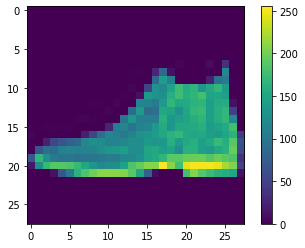

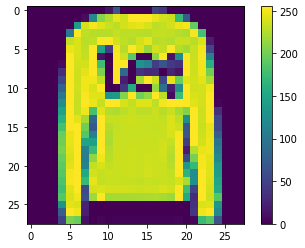

(None, None)

In [3]:
# Plot first two inputs before any preprocessing
def plot_img(img):
    plt.figure()
    plt.imshow(img)
    plt.colorbar()
    plt.grid(False)
    plt.show()
plot_img(x_test[0]), plot_img(x_test[1])

In [4]:
# Our model is expecting input of shape (None, 28, 28, 1) of float32s, scaled as follows:
x_test = x_test.astype('float32')
x_test = x_test / 255
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [5]:
# Call this to get predictions
def predict_json(project, model, instances, version=None):
    """Send json data to a deployed model for prediction.

    Args:
        project (str): project where the AI Platform Model is deployed.
        model (str): model name.
        instances ([Mapping[str: Any]]): Keys should be the names of Tensors
            your deployed model expects as inputs. Values should be datatypes
            convertible to Tensors, or (potentially nested) lists of datatypes
            convertible to tensors.
        version: str, version of the model to target.
    Returns:
        Mapping[str: any]: dictionary of prediction results defined by the
            model.
    """
    service = googleapiclient.discovery.build('ml', 'v1')
    name = 'projects/{}/models/{}'.format(project, model)

    if version is not None:
        name += '/versions/{}'.format(version)

    response = service.projects().predict(
        name=name,
        body={'instances': instances}
    ).execute()

    if 'error' in response:
        raise RuntimeError(response['error'])

    return response['predictions']

In [6]:
# Set credentials environment variable
%env GOOGLE_APPLICATION_CREDENTIALS=/home/reg/Downloads/auth-file.json

env: GOOGLE_APPLICATION_CREDENTIALS=/home/reg/Downloads/auth-file.json


In [7]:
# List Project names (we're using new-project-276117)
!gcloud projects list

PROJECT_ID                 NAME                       PROJECT_NUMBER
fir-setup-37e0b            FirebaseSetup              272296681318
imagerectest-190218        imageRecTest               827628162379
kerasdeploymenttutorial    KerasDeploymentTutorial    1067904841878
new-project-276117         new-project                1067246621448
pokemon-cover              Pokemon Cover              640080155091
reading-firebase-database  Reading Firebase Database  750997412773


In [13]:
## Get predictions for subset of data
inp = x_test[:2]
predictions = predict_json("new-project-276117", "my_model", inp.tolist(), version="v2")
predictions

[{'dense_2': [4.698009981041196e-09,
   1.3637375673170027e-09,
   2.139122878830335e-09,
   1.0145645035208872e-07,
   2.8348827729729464e-09,
   0.0011451812461018562,
   5.457192475688544e-09,
   0.0010937289334833622,
   1.3454819480784863e-08,
   0.9977610111236572]},
 {'dense_2': [0.0006632948061451316,
   4.203717196560319e-08,
   0.9988897442817688,
   1.9663693251459335e-07,
   0.0001090291261789389,
   5.4947331407095845e-11,
   0.00033769255969673395,
   4.330014125031312e-09,
   3.7253156115468755e-09,
   1.4893893410250492e-11]}]

In [14]:
# Our outputs are softmax layers - we need to take the argmax, and then convert it back to its word form
def extract_predictions(predictions):
    guesses = []
    for dic in predictions:
        guesses.append(np.argmax(dic['dense_2']))
    return guesses

guess_indicies = extract_predictions(predictions) # Extract guess indices from the cloud response
print(guess_indicies)

# Print a nice message for each prediction
def print_guesses(guess_indices):
    for i, index in enumerate(guess_indices):
        print("index " + str(i) + " is a " + class_names[index])

print_guesses(guess_indicies)

[9, 2]
index 0 is a Ankle boot
index 1 is a Pullover


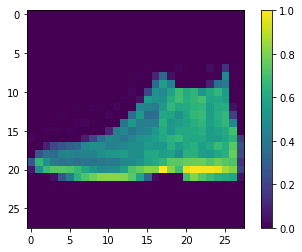

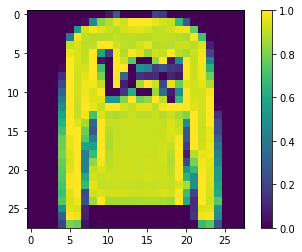

(None, None)

In [15]:
plot_img(x_test[0].reshape(28, 28)), plot_img(x_test[1].reshape(28, 28))